In [1]:
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np
plt.style.use("dark_paper")

In [2]:
imagenet_data = torchvision.datasets.MNIST("./data/")
# transform = torchvision.transforms.RandomAffine(0,translate=(0.1,0.1))

In [3]:
# Pick some example digits and put them in a 10 by 10 grid (280x280) images
nums  = list()
for num in range(10):
    loc = torch.where(imagenet_data.targets==num)[0][0]
    for i in range(10):
        istart = i * 28
        iend = (i+1) * 28
        for j in range(10):
            jstart = i * 28
            jend = (i+1) * 28
            zeros = torch.zeros(280, 280)
            zeros[istart:iend, jstart:jend] = imagenet_data.data[loc]
            nums.append(zeros)
nums = torch.stack(nums)

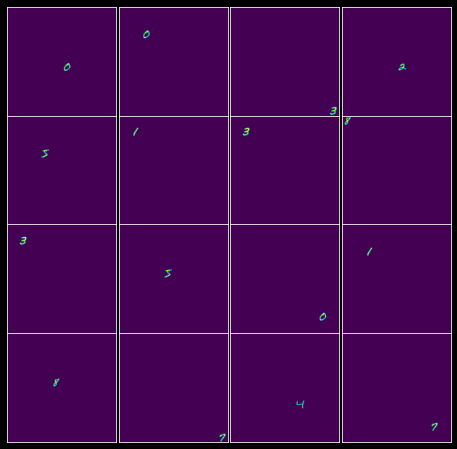

In [4]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,8))
for i,ax in zip(np.random.randint(0,nums.shape[0],size=16),axes.flatten()):
    ax.imshow(nums[i])
    ax.set_xticks([])
    ax.set_yticks([])
#fig.tight_layout(pad=0,h_pad=0,w_pad=0)
plt.subplots_adjust(hspace=0,wspace=0)

In [5]:
data_loader = torch.utils.data.DataLoader(nums,
                                          batch_size=4,
                                          shuffle=True)